Linearidade e Não-linearidade de uma rede
=========================================

Exemplo
_____________

Demonstração de que redes não-lineares possuem a capacidade de aprender padrões complexos.

Cenário
__________________
Treinar uma rede neural para classificar pontos em um plano 2D que pertencem a uma das duas classes: dentro ou fora de um círculo.

Gerar dados
_____________

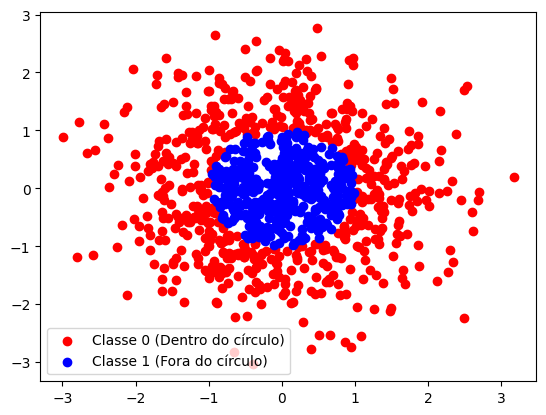

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Gerando dados
np.random.seed(0)
m = 1000  # número de exemplos
X = np.random.randn(m, 2)
Y = np.array((X[:, 0]**2 + X[:, 1]**2 < 1), dtype=int)

# Visualizando os dados
plt.scatter(X[Y == 0][:, 0], X[Y == 0][:, 1], color='red', label='Classe 0 (Dentro do círculo)')
plt.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], color='blue', label='Classe 1 (Fora do círculo)')
plt.legend()
plt.show()


Implementando uma rede linear
____________________________

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Convertendo dados para tensores
X_tensor = torch.tensor(X, dtype=torch.float32)
Y_tensor = torch.tensor(Y, dtype=torch.float32).unsqueeze(1)

# Criando um DataLoader
dataset = TensorDataset(X_tensor, Y_tensor)
loader = DataLoader(dataset, batch_size=32, shuffle=True)

# Definindo o modelo linear
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.fc = nn.Linear(2, 1)  # Camada linear

    def forward(self, x):
        return self.fc(x)  # Sem não linearidade

# Instanciando o modelo, definindo a perda e o otimizador
model_linear = LinearModel()
criterion = nn.BCEWithLogitsLoss()  # Combina Sigmoid e BCE
optimizer = optim.Adam(model_linear.parameters(), lr=0.01)

# Treinando o modelo
for epoch in range(100):
    for batch_x, batch_y in loader:
        optimizer.zero_grad()
        output = model_linear(batch_x)
        loss = criterion(output, batch_y)
        loss.backward()

        # Verificar gradientes
        for name, param in model_linear.named_parameters():
            if param.grad is not None:
                print(f"Gradient for {name}: {param.grad.abs().mean().item()}")

        optimizer.step()

# Avaliando o modelo
with torch.no_grad():
    output = model_linear(X_tensor)
    predictions = (torch.sigmoid(output) > 0.5).float()
    accuracy_linear = (predictions.eq(Y_tensor).sum() / m).item()
    print(f"Acurácia do modelo linear: {accuracy_linear:.2f}")


Gradient for fc.weight: 0.08434289693832397
Gradient for fc.bias: 0.0126400887966156
Gradient for fc.weight: 0.18561413884162903
Gradient for fc.bias: 0.1593303382396698
Gradient for fc.weight: 0.008265706710517406
Gradient for fc.bias: 0.035954155027866364
Gradient for fc.weight: 0.03353772684931755
Gradient for fc.bias: 0.008533354848623276
Gradient for fc.weight: 0.08668678253889084
Gradient for fc.bias: 0.12522266805171967
Gradient for fc.weight: 0.010223420336842537
Gradient for fc.bias: 0.02384660392999649
Gradient for fc.weight: 0.03133593872189522
Gradient for fc.bias: 0.028603415936231613
Gradient for fc.weight: 0.11891306936740875
Gradient for fc.bias: 0.03473998233675957
Gradient for fc.weight: 0.025146646425127983
Gradient for fc.bias: 0.041353754699230194
Gradient for fc.weight: 0.06740130484104156
Gradient for fc.bias: 0.06413574516773224
Gradient for fc.weight: 0.06426233053207397
Gradient for fc.bias: 0.16738760471343994
Gradient for fc.weight: 0.07246824353933334
Gradi

In [ ]:
# Definindo o modelo não linear
class NonLinearModel(nn.Module):
    def __init__(self):
        super(NonLinearModel, self).__init__()
        self.fc1 = nn.Linear(2, 4)  # Primeira camada
        self.relu = nn.ReLU()       # Função de ativação ReLU
        self.fc2 = nn.Linear(4, 1)  # Camada de saída

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instanciando o modelo, definindo a perda e o otimizador
model_non_linear = NonLinearModel()
optimizer = optim.Adam(model_non_linear.parameters(), lr=0.01)

# Treinando o modelo
for epoch in range(100):
    for batch_x, batch_y in loader:
        optimizer.zero_grad()
        output = model_non_linear(batch_x)
        loss = criterion(output, batch_y)
        loss.backward()

        # Verificar gradientes
        for name, param in model_non_linear.named_parameters():
            if param.grad is not None:
                print(f"Gradient for {name}: {param.grad.abs().mean().item()}")

        optimizer.step()

# Avaliando o modelo
with torch.no_grad():
    output = model_non_linear(X_tensor)
    predictions = (torch.sigmoid(output) > 0.5).float()
    accuracy_non_linear = (predictions.eq(Y_tensor).sum() / m).item()
    print(f"Acurácia do modelo não linear: {accuracy_non_linear:.2f}")


Gradient for fc1.weight: 0.009455671533942223
Gradient for fc1.bias: 0.009969677776098251
Gradient for fc2.weight: 0.024285495281219482
Gradient for fc2.bias: 0.013395818881690502
Gradient for fc1.weight: 0.010174775496125221
Gradient for fc1.bias: 0.012727225199341774
Gradient for fc2.weight: 0.033779121935367584
Gradient for fc2.bias: 0.013790544122457504
Gradient for fc1.weight: 0.0215859767049551
Gradient for fc1.bias: 0.02307305857539177
Gradient for fc2.weight: 0.07312880456447601
Gradient for fc2.bias: 0.2309105396270752
Gradient for fc1.weight: 0.014048436656594276
Gradient for fc1.bias: 0.012825366109609604
Gradient for fc2.weight: 0.04918745905160904
Gradient for fc2.bias: 0.039031751453876495
Gradient for fc1.weight: 0.010872911661863327
Gradient for fc1.bias: 0.009154237806797028
Gradient for fc2.weight: 0.03315679728984833
Gradient for fc2.bias: 0.10777455568313599
Gradient for fc1.weight: 0.018432224169373512
Gradient for fc1.bias: 0.014852972701191902
Gradient for fc2.we